Removed no burn in


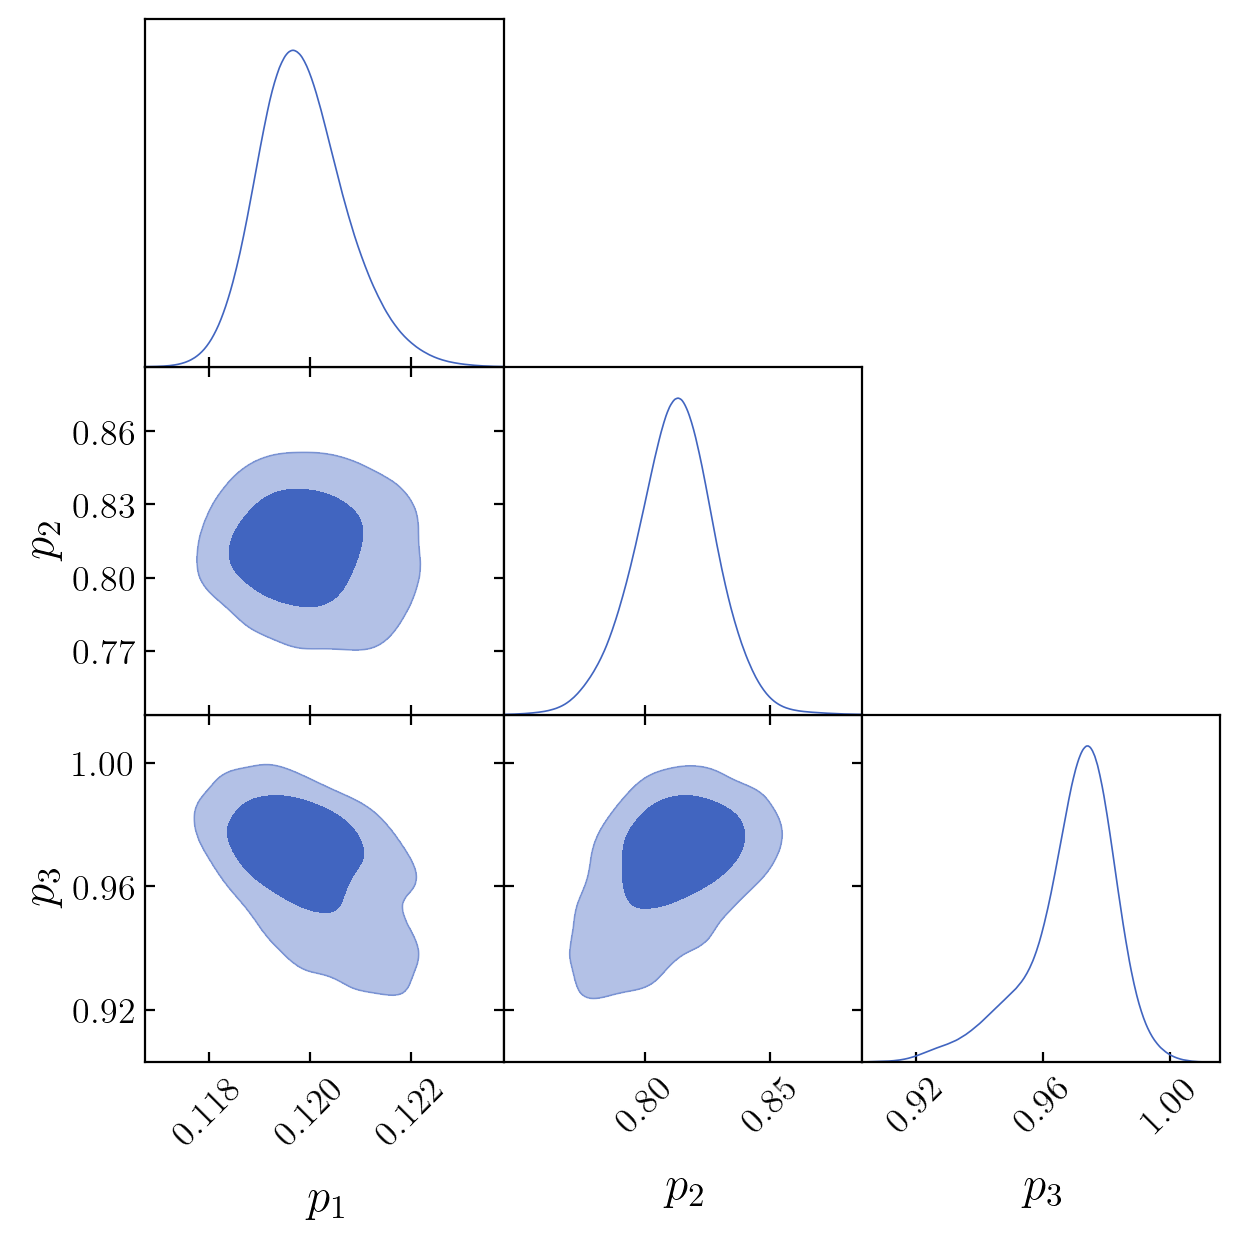

In [31]:
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


data_dir = Path('/pscratch/sd/e/epaillas/emc/posteriors/wei')


samples = np.fromfile(data_dir / 'Samples_c000_mock30_Omegab_prior_epoch206_loss0.1002.bin')
weights = np.fromfile(data_dir / 'Weights_c000_mock30_Omegab_prior_epoch206_loss0.1002.bin')
likelihoods = np.fromfile(data_dir / 'Likelihood_c000_mock30_Omegab_prior_epoch206_loss0.1002.bin')

chains = []
mcsamples = MCSamples(samples=samples.reshape(len(samples)//16,16)[:,1:4],
            loglikes=likelihoods,weights=weights)
chains.append(mcsamples)


g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g.triangle_plot(
    roots=chains,
    filled=True,
)
plt.show()
